In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pybaseball import *
sys.path.append('/home/dcooper/rockies/RockiesAnalysis/')
from utils.plotting.IVB_plot import plot_pitcher_home_away_movement
from utils.analysis.savant import get_pitcher_home_away_movement
from datetime import date
today = date.today().strftime("%Y-%m-%d")

import warnings
warnings.filterwarnings('ignore')

/home/dcooper/anaconda3/envs/rockies/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Load pitchers

In [2]:
# Load roster
from utils.scraping.rosters import scrape_roster
MLB_roster = scrape_roster(level='MLB')

Gathering player lookup table. This may take a moment.


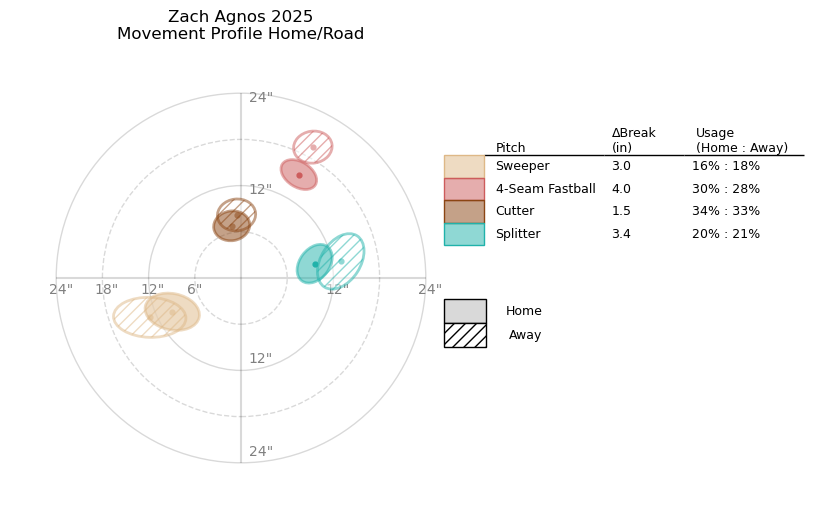

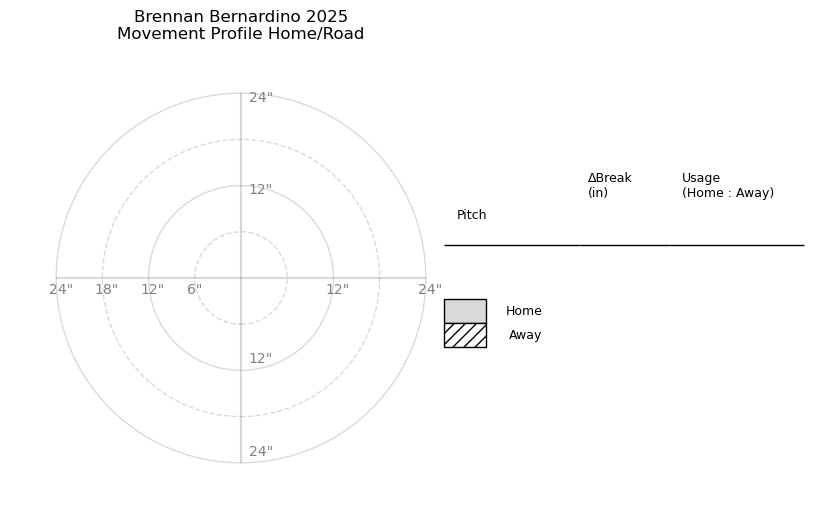

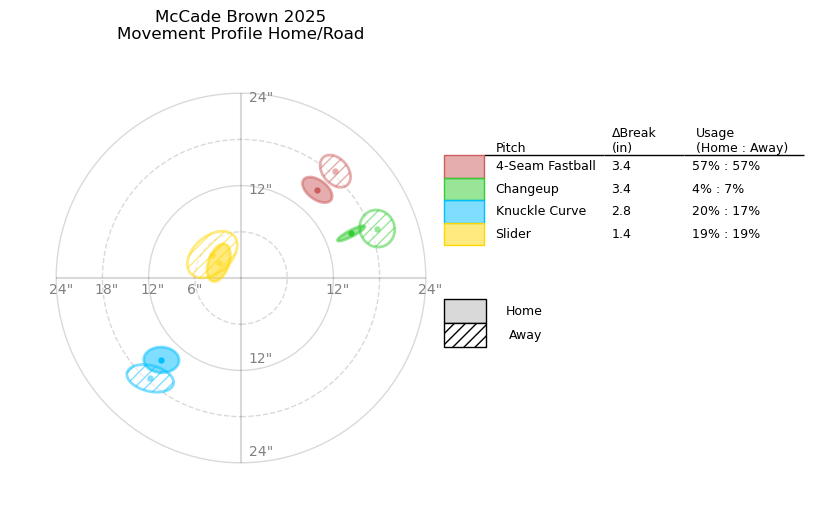

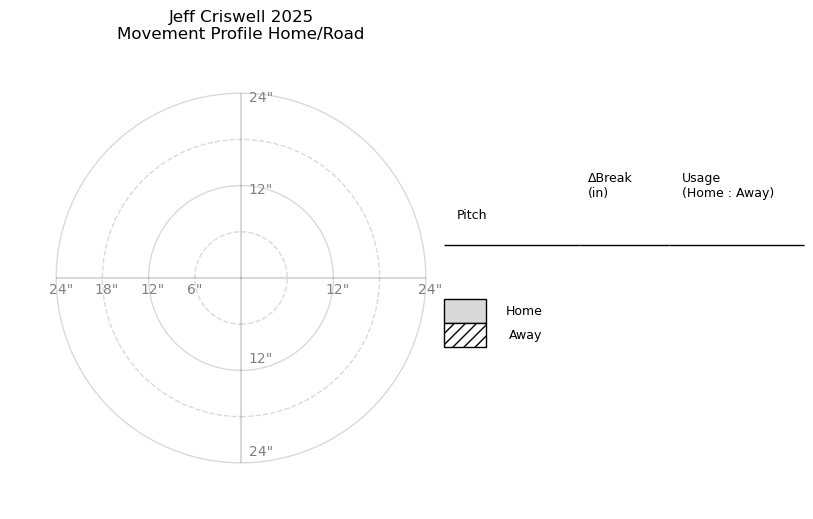

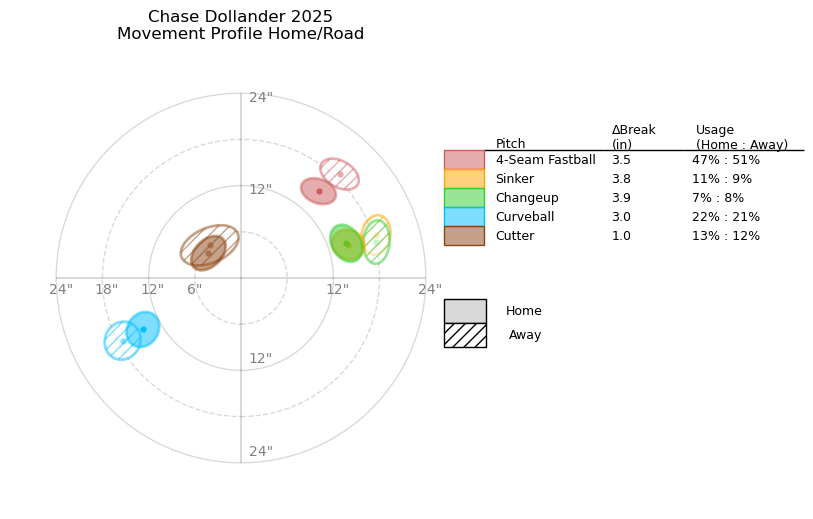

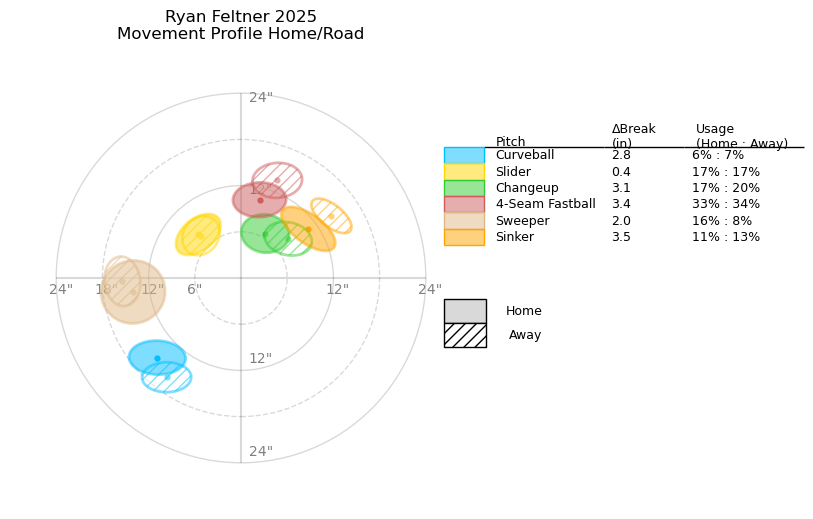

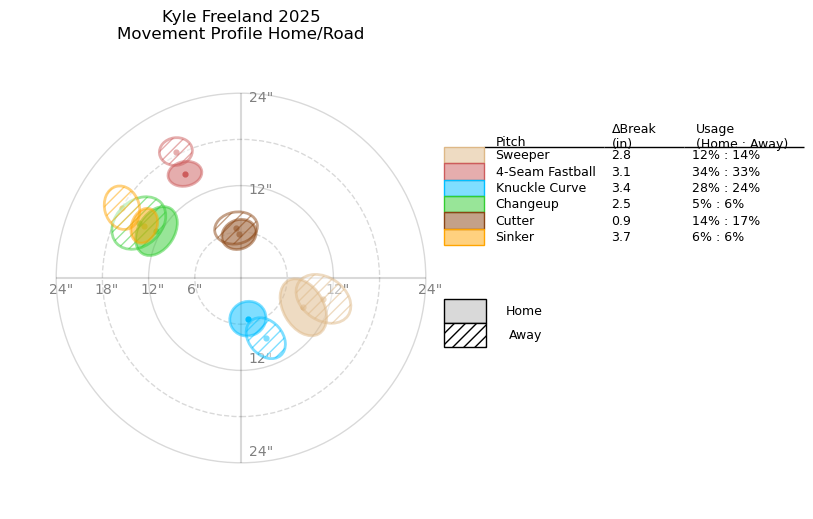

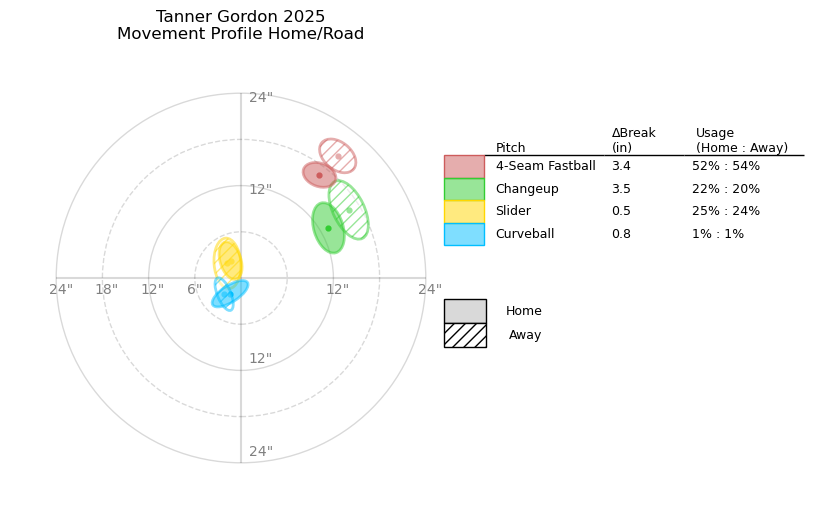

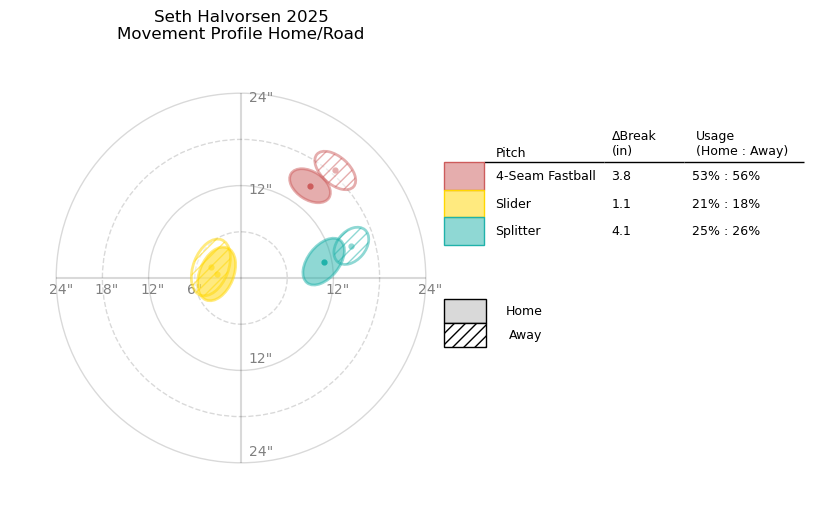

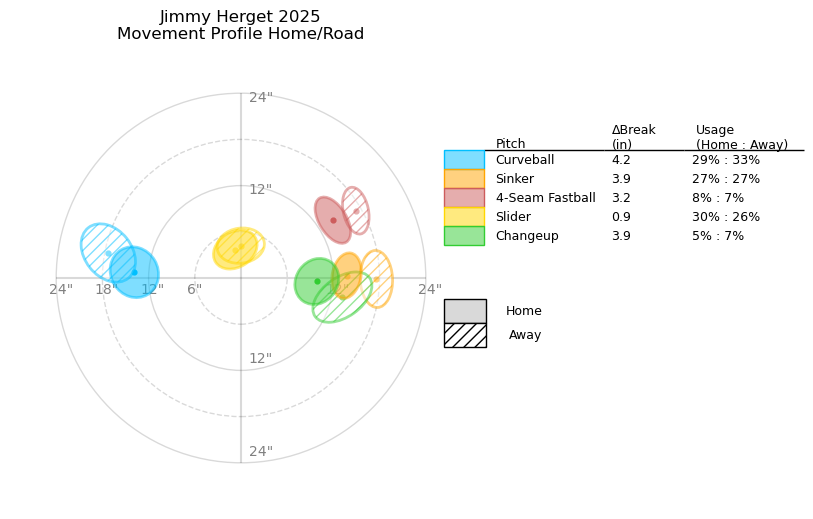

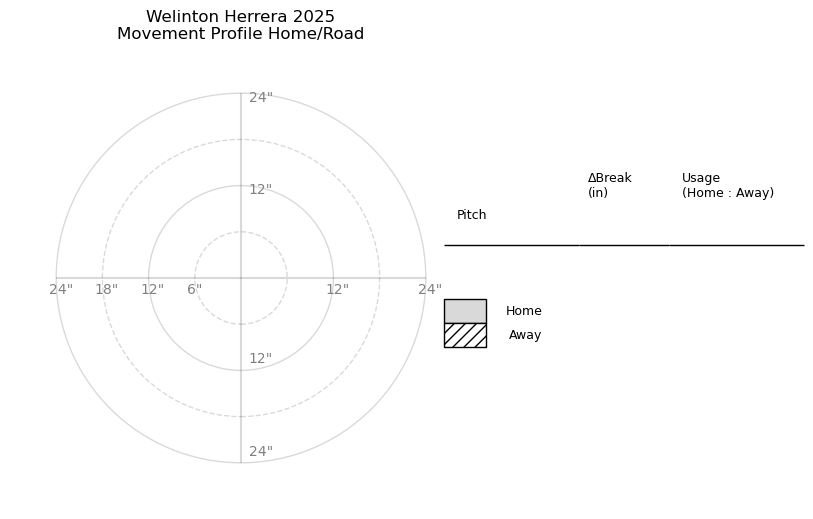

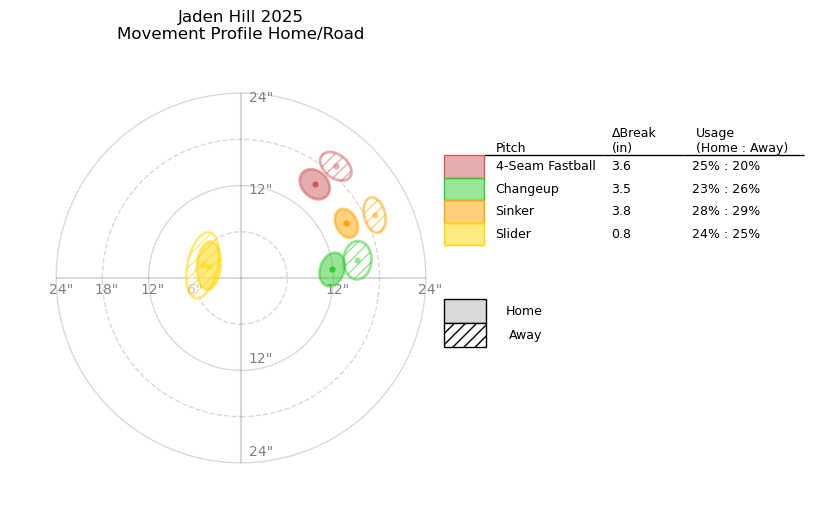

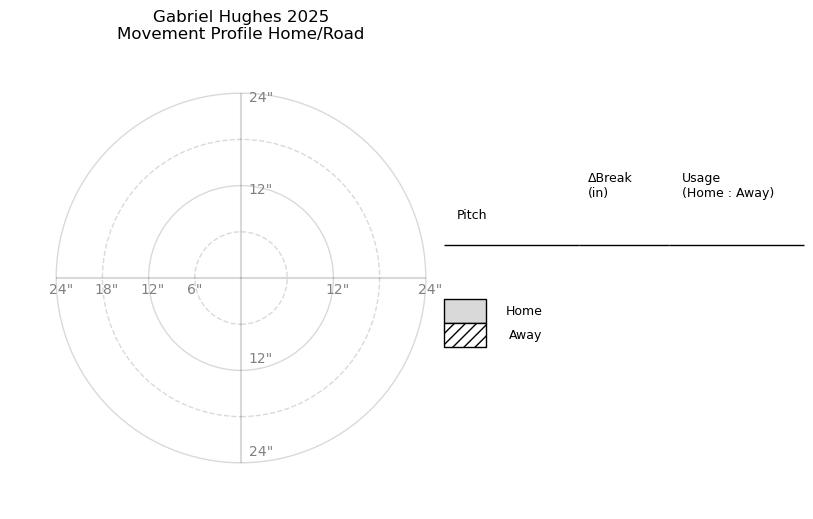

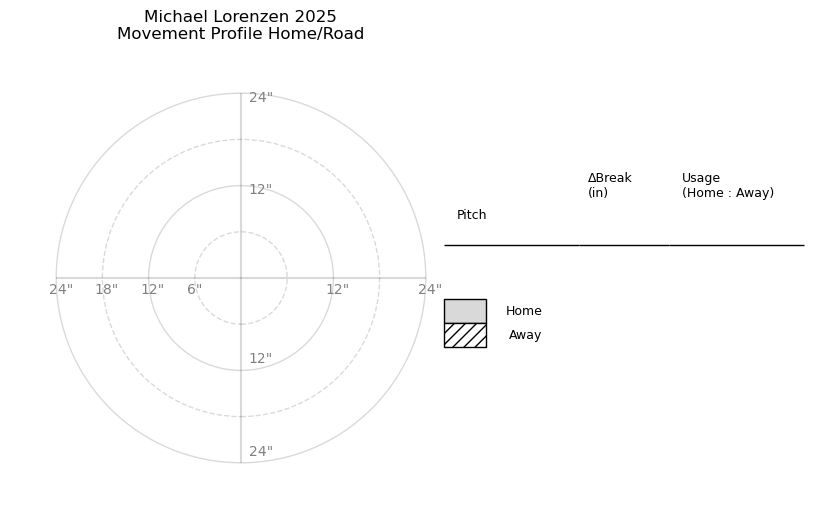

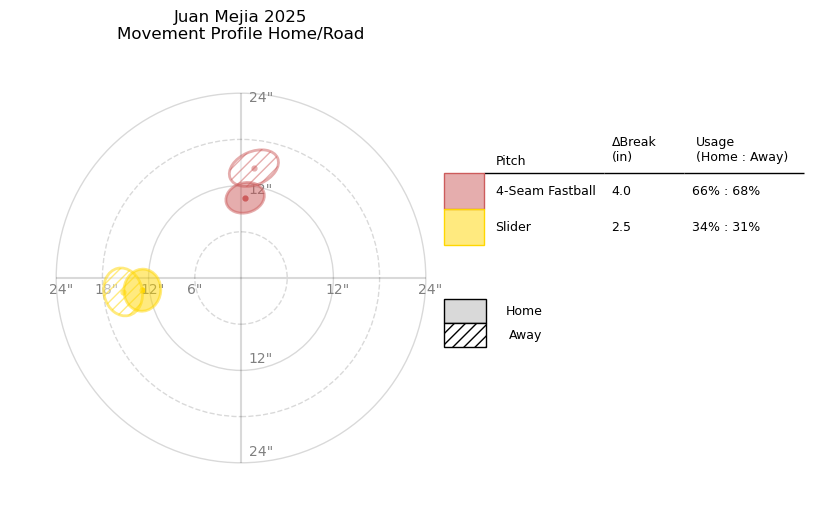

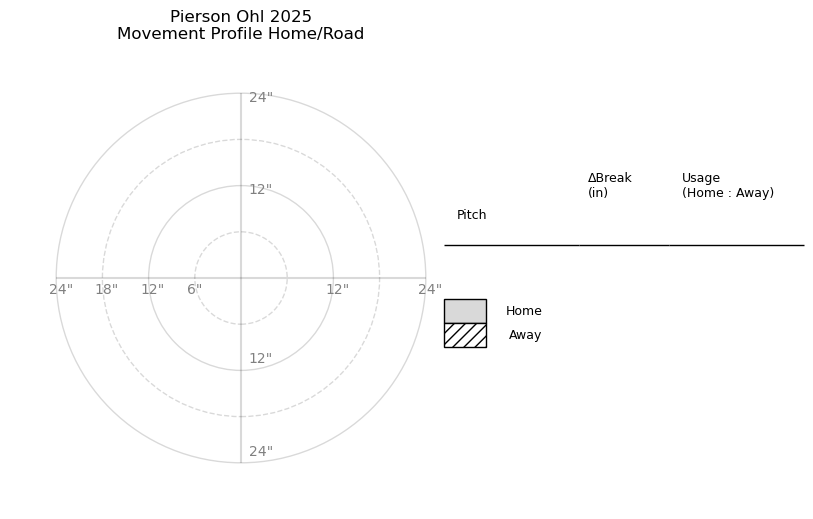

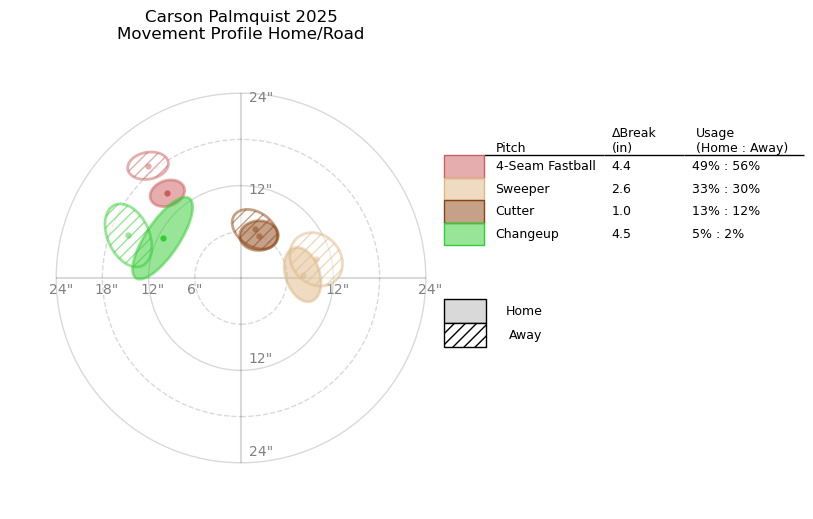

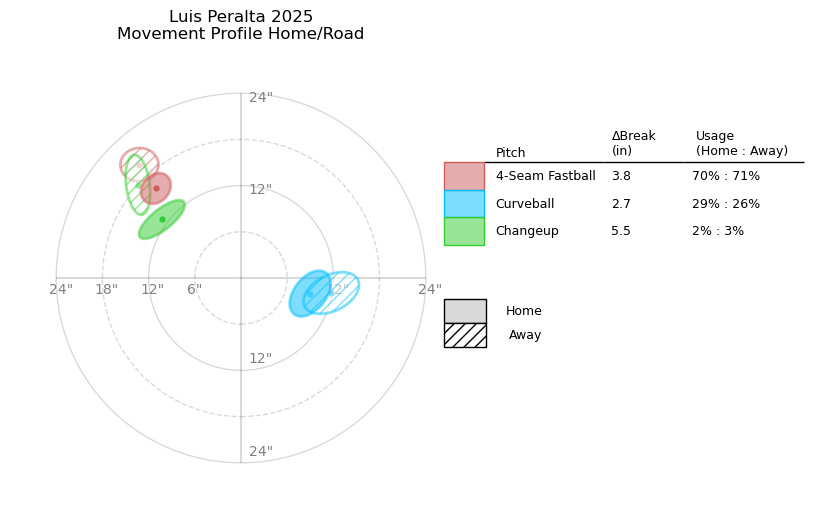

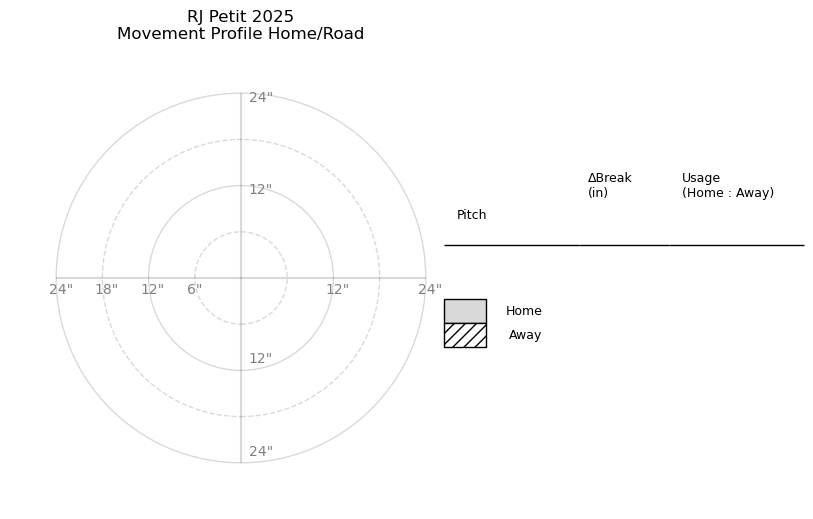

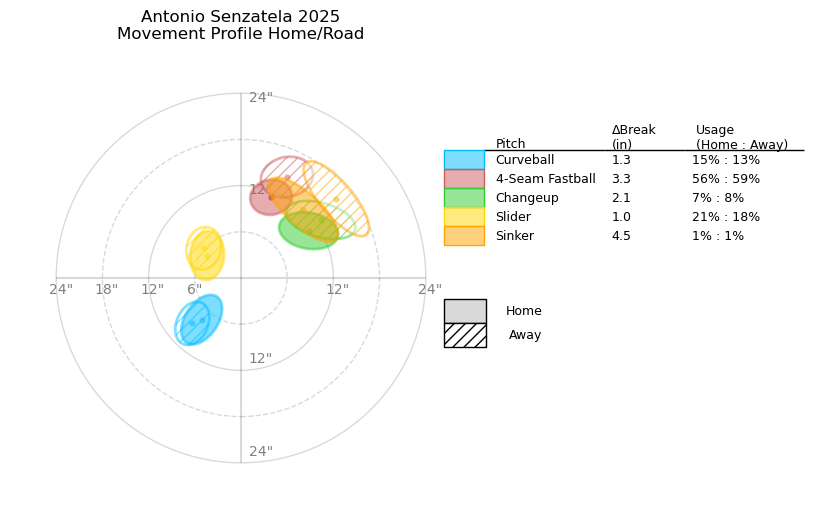

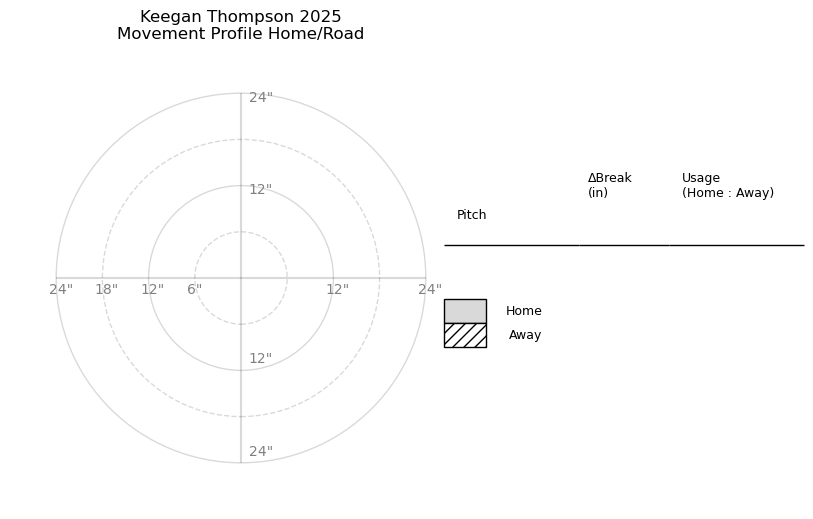

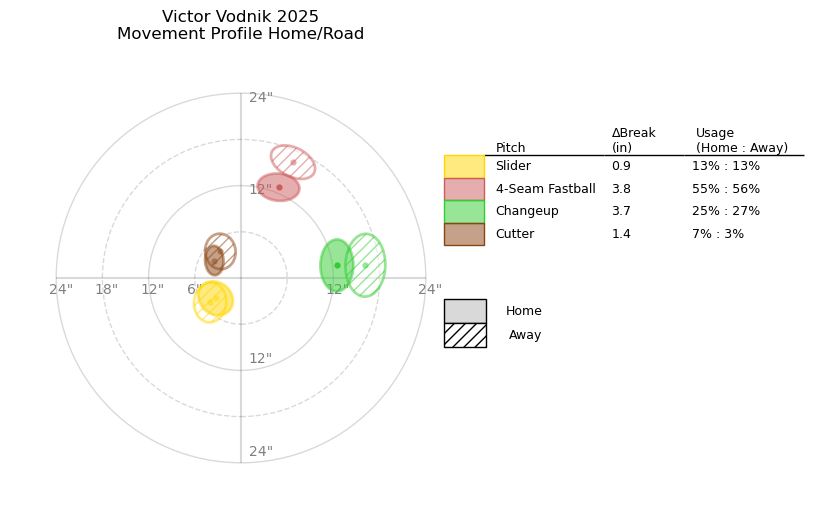

In [3]:
# Figure out who are pitchers
from utils.scraping.safe_playerid_lookup import fangraphs_playerid_lookup
from utils.scraping.fangraphs import get_player_fangraphs_props, is_pitcher
from utils.scraping.split_name import split_name

fig_dir = f'./{today}'
os.makedirs(fig_dir, exist_ok=True)
pitch_movement_df = pd.DataFrame(index=pd.MultiIndex(levels=[[],[]], codes=[[],[]], names=['Player', 'Pitch']), 
                                 columns=['Home X Break', 'Home Y Break', 'Away X Break', 'Away Y Break', 'ΔX Break', 'ΔY Break', 'ΔBreak', 'Home Usage', 'Away Usage'])
for i, name in enumerate(MLB_roster):
    
    player_props = get_player_fangraphs_props(*split_name(name), playerid=fangraphs_playerid_lookup(*split_name(name)))
    if is_pitcher(player_props):
        fig, ax, player_df = plot_pitcher_home_away_movement(*split_name(name))
        if player_df.shape[0] > 0:
            fig.savefig(os.path.join(fig_dir, name + '.png'), bbox_inches='tight')
        
        # Add to master df
        for pitch, r in player_df.iterrows():
            pitch_movement_df.loc[(name, pitch), :] = r



In [32]:
styled = (
    pitch_movement_df.sort_values('ΔBreak')
    .style
    .background_gradient(
        cmap="bwr",
        subset=["ΔX Break",	"ΔY Break",	"ΔBreak", "Home Usage", "Away Usage"],
    )
)
styled.to_html(os.path.join(fig_dir, 'summary.html'))
styled